<h2><center>Методы анализа текстов</center></h2>

### Этапы анализа текстов

При обработке текстов выделяют несколько этапов анализа.
* Токенизация (графематический анализ) - выделение абзацев, предложений, токенов. Если абзацы в HTML выделяются довольно просто - по тегам &lt;p&gt;, то с выделением предложений и слов могут быть проблемы.
`Г. Мурманск был основан 3 апреля 1915 г. ниже впадения р. Туломы в Кольский залив. Минимальные IP-адреса: 109.124.97.0 - 109.124.97.3.`
* Морфологический анализ (стемминг, лемматизация) - определение начальной формы слова или его псевдопрефикса, грамматических параметров. Подробнее описан ниже.
* Синтаксический анализ - определение связей между словами (деревья зависимостей) или синтаксически связанных групп слов (деревья составляющих). Первые больше подходят для русского языка, вторые - для английского.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/0/0d/Wearetryingtounderstandthedifference_%282%29.jpg">
    <a href="https://en.wikipedia.org/wiki/Dependency_grammar">Деревья зависимостей</a>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Competing_sentence_diagrams.png/750px-Competing_sentence_diagrams.png">
<a href="https://en.wikipedia.org/wiki/Constituent_(linguistics)">Деревья составляющих</a></center>

* Семантический анализ - определение смысла слова и работа с ним (`за'мок` vs `замо'к`, `удаление ребра связанного графа`; не путать с `он видел их семью своими глазами` где имеет место грамматическая неоднозначность `семья`-`семь`). Последнее время чаще используются дистрибутивные модели языка, о которых мы поговорим на отдельном занятии.

Задачей морфологического анализа является определение начальной формы слова, его части речи и грамматических параметров. В некоторых случаях от слова требуется только начальная форма, в других - только начальная форма и часть речи.<br>
Существует два больших подхода к морфологическому анализу: <b>стемминг</b> и <b>поиск по словарю</b>. Для проведения стемминга оставляется справочник всех окончаний для данного языка. Для пришедшего слова проверяется его окончание и по нему делается прогноз начальной формы и части речи.<br>
Например, мы создаем справочник, в котором записываем все окончания прилагательных: <i>-ому, -ему, -ой, -ая, -ий, -ый, ...</i> Теперь все слова, которые имеют такое окончание будут считаться прилагаельными: <i>синий, циклический, красного, больному</i>. Заодно прилагательными будут считаться причастия (<i>делающий, строившему</i>) и местоимения (<i>мой, твой, твоему</i>). Также не понятно что делать со словами, имеющими пустое окончание. Отдельную проблему составляют такие слова, как <i>стекло, больной, вина</i>, которые могут разбираться несколькими вариантами (это явление называется <b>омонимией</b>). Помимо этого, стеммер может просто откусывать окончания, оставляя лишь псевдооснову.<br>
Большинство проблем здесь решается, но точность работы бессловарных стеммеров находится на уровне 80%. Чтобы повысить точность испольуют морфологический анализ со словарем. Разработчики составляют словарь слов, встретившихся в текстах (<a href="http://opencorpora.org/dict.php">здесь</a> можно найти пример такого словаря). Теперь каждое слово будет искаться в словаре и не предсказываться, а выдаваться точно. Для слов, отсутствующих в словаре, может применяться предсказание, пообное работе стеммера.<br>

Пусть к нам в руки попал файл с новостями с сайта http://lenta.ru/ . Нам любопытно посмотреть какую-то статистику по этому сайту и его новостям.

Файл представляет собой просто текст с некоторым форматированием. Все новости отделены друг от друга пятью знаками равно, дальше идет дата новости, пять минусов, текст новости. 

Для начала загрузим новости в DataFrame.

In [1]:
import re
from tqdm import tqdm
import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 8)

/tmp/ipykernel_1117598/283842032.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/home/edward/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
# Если не хочется долгих экспериментов, в папке лежит сокращенная версия файла с новостями:
# summer22.txt
with open("data/lenta2018_summer2.txt", encoding="utf-8") as newsfile: # Файл с новостями.
    text_news = [(n.split("-----\n")[0].split('\n')[0], 
                  n.split("-----\n")[0].split('\n')[1], 
                  n.split("-----\n")[1]) for n in newsfile.read().split("=====\n")[1:]]
    news = pd.DataFrame(text_news, columns = ['Header', 'Date', 'News'])

In [6]:
!head data/lenta2018_summer2.txt


=====
«Королева дерьмовых роботов» перенесла операцию на мозге
2018/06/01
-----
Шведская YouTube-знаменитость Симона Герц (Simone Giertz), прославившаяся необычными изобретениями, перенесла операцию. Об этом рассказали ее представители в Twitter. Еще в конце апреля девушка сообщила подписчикам о недуге. Оказалось, что у нее в мозге обнаружили доброкачественную опухоль размером с мяч для гольфа. Блогер даже дала ей имя, назвав новообразование Брайаном.  Герц сильно переживала перед хирургическим вмешательством. В одном из предоперационных видео она говорила, что очень напугана. Однако врачи быстро удалили опухоль и спасли девушке жизнь. «Симона вышла из хирургии, и ее врачи очень довольны тем, как все прошло. Она проспала достаточно долго, чтобы сделать неуместную шутку, так что все хорошо», — говорится на ее странице в Twitter.  27-летняя изобретательница из Стокгольма прославилась несколько лет назад, показывая подписчикам свои бесполезные изобретения. Например, Герц демонстрировала 

In [7]:
news.head()

,Header,Date,News
0,«Королева дерьмовых роботов» перенесла операци...,2018/06/01,Шведская YouTube-знаменитость Симона Герц (Sim...
1,У Су-57 нашли «тайные ноу-хау»,2018/06/01,Перспективный российский многофункциональный и...
2,Знарок лишился еще одного поста,2018/06/01,Санкт-петербургский клуб Континентальной хокке...
3,СК заинтересовался задержанием аутиста московс...,2018/06/01,Следственный комитет по Москве начал проверку ...
4,Киевляне перекрыли проспект из-за сбитого поли...,2018/06/01,Более 100 жителей Киева перекрыли проспект Гри...


Посмотрим насколько активно публикуются новости в разные дни.

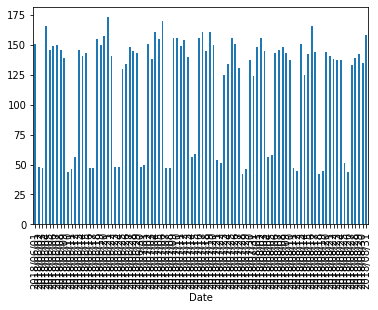

In [8]:
text_summary = news.groupby('Date').count().drop('Header', axis=1)
ax = text_summary.plot.bar(y='News') # Рисуем частоты.
ax.get_legend().remove() # Легенда всё равно только мешала.

Попробуем посмотреть какие слова чаще всего встречаются в новостях за каждый день. 

Разделение на слова будем проводить простейшим образом, будем считать что слово - это много русских или латинских букв.

In [9]:
# Поделим на слова при помощи регулярных выражений.
words = re.findall('[A-Za-zА-ЯЁа-яё]+-[A-Za-zА-ЯЁа-яё]+|[A-Za-zА-ЯЁа-яё]+', news.News.iloc[0])
words

['Шведская',
 'YouTube-знаменитость',
 'Симона',
 'Герц',
 'Simone',
 'Giertz',
 'прославившаяся',
 'необычными',
 'изобретениями',
 'перенесла',
 'операцию',
 'Об',
 'этом',
 'рассказали',
 'ее',
 'представители',
 'в',
 'Twitter',
 'Еще',
 'в',
 'конце',
 'апреля',
 'девушка',
 'сообщила',
 'подписчикам',
 'о',
 'недуге',
 'Оказалось',
 'что',
 'у',
 'нее',
 'в',
 'мозге',
 'обнаружили',
 'доброкачественную',
 'опухоль',
 'размером',
 'с',
 'мяч',
 'для',
 'гольфа',
 'Блогер',
 'даже',
 'дала',
 'ей',
 'имя',
 'назвав',
 'новообразование',
 'Брайаном',
 'Герц',
 'сильно',
 'переживала',
 'перед',
 'хирургическим',
 'вмешательством',
 'В',
 'одном',
 'из',
 'предоперационных',
 'видео',
 'она',
 'говорила',
 'что',
 'очень',
 'напугана',
 'Однако',
 'врачи',
 'быстро',
 'удалили',
 'опухоль',
 'и',
 'спасли',
 'девушке',
 'жизнь',
 'Симона',
 'вышла',
 'из',
 'хирургии',
 'и',
 'ее',
 'врачи',
 'очень',
 'довольны',
 'тем',
 'как',
 'все',
 'прошло',
 'Она',
 'проспала',
 'достаточно'

Можно, конечно, посчитать слова вручную или при помощи Counter.

In [10]:
from collections import Counter # Не считать же частоты самим.

wdict = Counter(words) # Объект сразу посчитает частоты элементов списка.
print(wdict)
print({w:n for w,n in wdict.items() if n>1}) # Посмотрим какие слова встречаются больше одного раза.

Counter({'в': 5, 'Герц': 4, 'ее': 4, 'что': 3, 'из': 3, 'Симона': 2, 'Twitter': 2, 'девушка': 2, 'подписчикам': 2, 'опухоль': 2, 'с': 2, 'для': 2, 'очень': 2, 'врачи': 2, 'и': 2, 'все': 2, 'на': 2, 'Шведская': 1, 'YouTube-знаменитость': 1, 'Simone': 1, 'Giertz': 1, 'прославившаяся': 1, 'необычными': 1, 'изобретениями': 1, 'перенесла': 1, 'операцию': 1, 'Об': 1, 'этом': 1, 'рассказали': 1, 'представители': 1, 'Еще': 1, 'конце': 1, 'апреля': 1, 'сообщила': 1, 'о': 1, 'недуге': 1, 'Оказалось': 1, 'у': 1, 'нее': 1, 'мозге': 1, 'обнаружили': 1, 'доброкачественную': 1, 'размером': 1, 'мяч': 1, 'гольфа': 1, 'Блогер': 1, 'даже': 1, 'дала': 1, 'ей': 1, 'имя': 1, 'назвав': 1, 'новообразование': 1, 'Брайаном': 1, 'сильно': 1, 'переживала': 1, 'перед': 1, 'хирургическим': 1, 'вмешательством': 1, 'В': 1, 'одном': 1, 'предоперационных': 1, 'видео': 1, 'она': 1, 'говорила': 1, 'напугана': 1, 'Однако': 1, 'быстро': 1, 'удалили': 1, 'спасли': 1, 'девушке': 1, 'жизнь': 1, 'вышла': 1, 'хирургии': 1, 'дов

 Фактически, выше мы провели преобразование текста в вектор. Пространство вектора определено на словаре текста - количество измерений совпадает с количеством слов, каждому измерению сопоставлено какое-то слово и отложена его частота. Подобный подход называют мешком слов (Bag of Words, BoW), так как все слова перемешиваются, их порядок больше не соблюдается, а сами слова сваливаются в один "мешок".

![](img/donkey_carrot_text.png)

Обратите внимание на распределение частот в отдельных словах и парах. Такое распределение называется [распределением Ципфа](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%A6%D0%B8%D0%BF%D1%84%D0%B0) и является характерным практически для любого распределения частот слов и их комбинаций в текстах на любом естественном языке.

$p_i=\frac{p_0}{\beta^{-\alpha*i}}$, где $\alpha\approx1$.

![](https://upload.wikimedia.org/wikipedia/ru/thumb/d/d8/WikipediaZipf20061023.png/450px-WikipediaZipf20061023.png)

Но вообще, для расчета частот существует CountVectorizer, который позволяет сделать это всё за один раз и очень хорошо ложится в конвейер.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
counter = CountVectorizer()
# Просим посчитать частоты слов.
res = counter.fit_transform([news.News.iloc[0]])
# Разреженное представление счетчика.
print(res[0,:10]) # По идентификатору можно получить частоту слова.
# Можно получить индекс по слову, ...
print('герц', counter.vocabulary_.get('герц'))
# ... но не наоборот.
print(counter.vocabulary_.get(18))
print(counter.vocabulary_) # Словарь, который сопоставляет слову его идентификатор.

  (0, 4)	1
  (0, 2)	1
  (0, 1)	1
  (0, 3)	2
  (0, 6)	1
  (0, 8)	1
  (0, 0)	1
  (0, 7)	1
  (0, 5)	1
  (0, 9)	1
герц 18
None
{'шведская': 123, 'youtube': 4, 'знаменитость': 37, 'симона': 104, 'герц': 18, 'simone': 2, 'giertz': 1, 'прославившаяся': 89, 'необычными': 66, 'изобретениями': 42, 'перенесла': 81, 'операцию': 76, 'об': 70, 'этом': 125, 'рассказали': 94, 'ее': 33, 'представители': 87, 'twitter': 3, 'еще': 35, 'конце': 46, 'апреля': 6, 'девушка': 24, 'сообщила': 106, 'подписчикам': 83, 'недуге': 64, 'оказалось': 74, 'что': 121, 'нее': 65, 'мозге': 54, 'обнаружили': 71, 'доброкачественную': 29, 'опухоль': 77, 'размером': 93, 'мяч': 56, 'для': 28, 'гольфа': 21, 'блогер': 8, 'даже': 22, 'дала': 23, 'ей': 34, 'имя': 43, 'назвав': 59, 'новообразование': 69, 'брайаном': 10, 'сильно': 103, 'переживала': 80, 'перед': 79, 'хирургическим': 117, 'вмешательством': 14, 'одном': 73, 'из': 38, 'предоперационных': 86, 'видео': 13, 'она': 75, 'говорила': 19, 'очень': 78, 'напугана': 63, 'однако': 

 На вход классу подается список текстов. Результатом работы является [разреженная матрица](https://docs.scipy.org/doc/scipy/reference/sparse.html) частот слов. Если мы возьмем большое количество текстов, то в кажом из них встречается не так много разных слов, но словарь всех текстов вместе будет огромен. Обработка текстов должна вестись в едином пространстве. Пусть это будет пространство словаря всех текстов (в противном случае у каждого текста будет свое собственное пространство, что чрезвычайно неудобно). Получается, что для текста с маленьким словарем мы должны хранить большое число нулей. Для того, чтобы этого избежать, хранят, например, один раз номер строки, индексы ненулевых значений и сами значения, то есть чуть больше двух чисел на ненулевое значение. Если считать, что словарь заметки - 100 слов, а словарь всех текстов - 100 000 слов, мы получаем экономию места в 500 раз. То, что считалось на кластере, теперь может считаться на недобуке с 2 Гб оперативной памяти.

![](img/term-document-matrix-bow-annotated.png)

Изображение взято [отсюда](https://livebook.manning.com/book/natural-language-processing-in-action/chapter-4/v-4/61).

Обратите внимание, что все слова приведены к маленьким буквам, но про слова с дефисом этот класс ничего не знает.

Чтобы исправить эту ситуацию можно передать собственное регулярное выражение для разделения на слова.

In [13]:
# Среди прочего, можно указать регулярное выражение, которое будет выделять слова.
counter = CountVectorizer(token_pattern=r'[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+')
# Обратите внимание, передается список текстов.
res = counter.fit_transform([news.News.iloc[0]])
print(counter.vocabulary_) 

{'шведская': 127, 'youtube-знаменитость': 3, 'симона': 107, 'герц': 18, 'simone': 1, 'giertz': 0, 'прославившаяся': 91, 'необычными': 67, 'изобретениями': 42, 'перенесла': 83, 'операцию': 78, 'об': 72, 'этом': 129, 'рассказали': 96, 'ее': 33, 'представители': 89, 'в': 12, 'twitter': 2, 'еще': 35, 'конце': 47, 'апреля': 5, 'девушка': 24, 'сообщила': 109, 'подписчикам': 85, 'о': 71, 'недуге': 65, 'оказалось': 76, 'что': 125, 'у': 118, 'нее': 66, 'мозге': 55, 'обнаружили': 73, 'доброкачественную': 29, 'опухоль': 79, 'размером': 95, 'с': 100, 'мяч': 57, 'для': 28, 'гольфа': 21, 'блогер': 7, 'даже': 22, 'дала': 23, 'ей': 34, 'имя': 43, 'назвав': 60, 'новообразование': 70, 'брайаном': 9, 'сильно': 106, 'переживала': 82, 'перед': 81, 'хирургическим': 121, 'вмешательством': 14, 'одном': 75, 'из': 38, 'предоперационных': 88, 'видео': 13, 'она': 77, 'говорила': 19, 'очень': 80, 'напугана': 64, 'однако': 74, 'врачи': 15, 'быстро': 11, 'удалили': 119, 'и': 37, 'спасли': 110, 'девушке': 25, 'жизнь'

Помимо этого, CountVectorizer умеет выделять n-граммы, то есть последовательности из n букв или слов.

In [14]:
# ngram_range - это кортеж, который указывает длины последовательсностей, которые надо выделить. 
# Обязательны оба значения. Если хочется извлечь 4-граммы, надо передать (4,4).
counter = CountVectorizer(ngram_range=(1,2), token_pattern=r'[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+')
res = counter.fit_transform([news.News.iloc[0]])
print(counter.vocabulary_)

{'шведская': 279, 'youtube-знаменитость': 7, 'симона': 236, 'герц': 43, 'simone': 2, 'giertz': 0, 'прославившаяся': 203, 'необычными': 152, 'изобретениями': 102, 'перенесла': 187, 'операцию': 175, 'об': 162, 'этом': 283, 'рассказали': 213, 'ее': 78, 'представители': 199, 'в': 25, 'twitter': 4, 'еще': 85, 'конце': 112, 'апреля': 11, 'девушка': 58, 'сообщила': 241, 'подписчикам': 191, 'о': 160, 'недуге': 148, 'оказалось': 170, 'что': 273, 'у': 259, 'нее': 150, 'мозге': 128, 'обнаружили': 164, 'доброкачественную': 70, 'опухоль': 177, 'размером': 211, 'с': 221, 'мяч': 132, 'для': 67, 'гольфа': 52, 'блогер': 15, 'даже': 54, 'дала': 56, 'ей': 83, 'имя': 104, 'назвав': 138, 'новообразование': 158, 'брайаном': 19, 'сильно': 234, 'переживала': 185, 'перед': 183, 'хирургическим': 265, 'вмешательством': 33, 'одном': 168, 'из': 92, 'предоперационных': 197, 'видео': 31, 'она': 172, 'говорила': 48, 'очень': 180, 'напугана': 146, 'однако': 166, 'врачи': 35, 'быстро': 23, 'удалили': 261, 'и': 89, 'спа

Давайте выделим пять самых частотных слов или словосочетаний из текста новости. Заодно воспользуемся тем фактом, что CountVectorizer умеет работать со списками новостей.

In [15]:
def getMostFrequentWords(text):
    counter=CountVectorizer(ngram_range=(1,2), 
                            token_pattern=r'[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+')
    res=counter.fit_transform([text])
    frq = sorted([(i, res[0,i]) for i in range(res[0].shape[1])], 
                 key = lambda x: x[1], reverse = True)[:5]
    vocab = {w:res[0,i] for w,i in counter.vocabulary_.items()}
    return [[w for w, n in counter.vocabulary_.items() if n==i][0] 
            for i, f in frq], vocab
    

In [16]:
   
freqwords = []
vocabs = []
for i in tqdm(range(news.shape[0])):
    fw, v = getMostFrequentWords(news.News.iloc[i])
    freqwords.append(fw)
    vocabs.append(v)
    
news['Vocabular'] = vocabs
news['Freq Words'] = freqwords

100%|████████████████████████████████████| 10831/10831 [01:25<00:00, 126.18it/s]


In [17]:
news.head()

,Header,Date,News,Vocabular,Freq Words
0,«Королева дерьмовых роботов» перенесла операци...,2018/06/01,Шведская YouTube-знаменитость Симона Герц (Sim...,"{'шведская': 1, 'youtube-знаменитость': 1, 'си...","[в, герц, ее, из, что]"
1,У Су-57 нашли «тайные ноу-хау»,2018/06/01,Перспективный российский многофункциональный и...,"{'перспективный': 1, 'российский': 1, 'многофу...","[су, в, не, на, ни]"
2,Знарок лишился еще одного поста,2018/06/01,Санкт-петербургский клуб Континентальной хокке...,"{'санкт-петербургский': 1, 'клуб': 2, 'контине...","[и, в, знарок, ска, тренера]"
3,СК заинтересовался задержанием аутиста московс...,2018/06/01,Следственный комитет по Москве начал проверку ...,"{'следственный': 1, 'комитет': 1, 'по': 3, 'мо...","[в, его, и, к, по]"
4,Киевляне перекрыли проспект из-за сбитого поли...,2018/06/01,Более 100 жителей Киева перекрыли проспект Гри...,"{'более': 1, 'жителей': 1, 'киева': 2, 'перекр...","[в, на, автомобиль, в котором, дтп]"


В получившемся списке есть несколько проблем. <br>
Во-первых, самыми частотными оказываются наименее информативные слова - предлоги, союзы и т.д.<br>
Во-вторых, если под словом понимать его начальную форму, то слова в тексте встречаются чаще, чем мы это рассчитали.<br>
Как первая, так и вторая проблема решаются при помощи морфологического анализа.<br>

Посмотрим как работает словарная морфология на примере системы pymorphy2.

In [18]:
import pymorphy2 # Морфологический анализатор.

In [19]:
morph = pymorphy2.MorphAnalyzer() # Создает объект морфоанализатора и загружет словарь.
wordform = morph.parse('стекло')  # Проведем анализ слова "стекло"...
print(wordform)                 # ... и посмотрим на результат.

[Parse(word='стекло', tag=OpencorporaTag('NOUN,inan,neut sing,nomn'), normal_form='стекло', score=0.690476, methods_stack=((DictionaryAnalyzer(), 'стекло', 157, 0),)), Parse(word='стекло', tag=OpencorporaTag('NOUN,inan,neut sing,accs'), normal_form='стекло', score=0.285714, methods_stack=((DictionaryAnalyzer(), 'стекло', 157, 3),)), Parse(word='стекло', tag=OpencorporaTag('VERB,perf,intr neut,sing,past,indc'), normal_form='стечь', score=0.023809, methods_stack=((DictionaryAnalyzer(), 'стекло', 1015, 3),))]


In [20]:
wordform=morph.parse('пырялись') 
wordform

[Parse(word='пырялись', tag=OpencorporaTag('VERB,impf,intr plur,past,indc'), normal_form='пыряться', score=1.0, methods_stack=((FakeDictionary(), 'пырялись', 234, 10), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'ялись')))]

In [21]:
wordform[0].score

1.0

In [22]:
wordform[0].tag

OpencorporaTag('VERB,impf,intr plur,past,indc')

Как видно из вывода, слово "стекло" может быть неодушевленным существительным среднего рода, единственного числа, именительного падежа <i>tag=OpencorporaTag('NOUN,inan,neut sing,nomn')</i>, аналогично, но в винительном падеже (<i>'NOUN,inan,neut sing,accs'</i>), и глаголом <i>'VERB,perf,intr neut,sing,past,indc'</i>. При этом в первой форме оно встречается в 75% случаев (<i>score=0.75</i>), во второй в 18,75% случаев (<i>score=0.1875</i>), а как глагол - лишь в 6,25% (<i>score=0.0625</i>). Самым простым видом борьбы с омонимией является выбор нулевого элемента из списка, возвращенного морфологическим анализом. Такой подход дает около 90% точности при выборе начальной формы и до 80% если мы обращаем внимание на грамматические параметры.<br><br>
Вместо Pymorphy можно использовать PyMystem. Его плюсом является тот факт, что он сам проводит графематический анализ и снимает омонимию. Используя функцию lemmatize можно получить набор начальных форм слов. Используя функцию analyze можно получить полную информацию о словах.

In [23]:
import pymystem3 # Еще один морфологический анализатор. При первом запуске грузит словари из Сети.

In [24]:
mystem=pymystem3.Mystem()
print(mystem.lemmatize('эти типы стали есть в цеху.'))
print(mystem.analyze('эти типы стали есть в цеху.'))

['этот', ' ', 'тип', ' ', 'становиться', ' ', 'есть', ' ', 'в', ' ', 'цех', '.', '\n']
[{'analysis': [{'lex': 'этот', 'wt': 1, 'gr': 'APRO=(им,мн|вин,мн,неод)'}], 'text': 'эти'}, {'text': ' '}, {'analysis': [{'lex': 'тип', 'wt': 0.8700298642, 'gr': 'S,муж,неод=(вин,мн|им,мн)'}], 'text': 'типы'}, {'text': ' '}, {'analysis': [{'lex': 'становиться', 'wt': 0.9821285244, 'gr': 'V,нп=прош,мн,изъяв,сов'}], 'text': 'стали'}, {'text': ' '}, {'analysis': [{'lex': 'есть', 'wt': 0.0492236161, 'gr': 'V,несов,пе=инф'}], 'text': 'есть'}, {'text': ' '}, {'analysis': [{'lex': 'в', 'wt': 0.9999917878, 'gr': 'PR='}], 'text': 'в'}, {'text': ' '}, {'analysis': [{'lex': 'цех', 'wt': 1, 'gr': 'S,муж,неод=(дат,ед|местн,ед)'}], 'text': 'цеху'}, {'text': '.'}, {'text': '\n'}]


In [25]:
my_res=mystem.analyze('эти типы стали есть в цеху.')
if 'analysis' in my_res[0].keys():
    print(my_res[0]['analysis'][0]['gr'].split("=")[0])

APRO


Функция `lemmatize` делит текст на слова и знаки препинания, а затем возвращает для них только начальную форму.

Функция `analyze` возвращает не только начальную форму, но и всю информацию о слове, как это делал перед этим Pymorphy. 

Основным отличием является то, что Mystem снимает омонимию. Как видно из примера, делает он это не всегда корректно, но нам не придется думать о том, какое вариант разбора следует взять.

Еще одна библиотека - NLTK. По сравнению с двумя предыдущими библиотеками она обладает более широкой функциональностью и изначально писалась для работы с разными языками.

In [26]:
import nltk # Иностранный морфологический анализатор.

Перед началом использования необходимо загрузить необходимые библиотеки или корпуса.

In [27]:
nltk.download() # По дороге будут появляться поле ввода. Грузит всё из Сети.

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Можно сразу скачать нужный пакет, если вы знаете как он назыввается.

In [28]:
nltk.download(['averaged_perceptron_tagger_ru', 'stopwords'])

[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /home/edward/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_ru is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/edward/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Функция `word_tokenize` возвращает начальные формы слов. 

Функция `pos_tag` возвращает список начальных форм и их частей речи.

In [29]:
tokens = nltk.word_tokenize('Эти типы стали есть в цеху') # Токенизация.
bi_tokens = list(nltk.bigrams(tokens))
tokens, bi_tokens

(['Эти', 'типы', 'стали', 'есть', 'в', 'цеху'],
 [('Эти', 'типы'),
  ('типы', 'стали'),
  ('стали', 'есть'),
  ('есть', 'в'),
  ('в', 'цеху')])

In [30]:
pos = nltk.pos_tag(tokens) # Частеречная разметка.
bi_pos = list(nltk.bigrams(pos))
pos, bi_pos


([('Эти', 'JJ'),
  ('типы', 'NNP'),
  ('стали', 'NNP'),
  ('есть', 'NNP'),
  ('в', 'NNP'),
  ('цеху', 'NN')],
 [(('Эти', 'JJ'), ('типы', 'NNP')),
  (('типы', 'NNP'), ('стали', 'NNP')),
  (('стали', 'NNP'), ('есть', 'NNP')),
  (('есть', 'NNP'), ('в', 'NNP')),
  (('в', 'NNP'), ('цеху', 'NN'))])

У NLTK заведен список стоп-слов, которые лучше фильтровать при анализе текстов. Но их не очень много. Зато самые мешающиеся.

In [31]:
# Оставим только те слова, которых нет в списке стоп-слов.
filtered_words = [token for token in tokens if token not in nltk.corpus.stopwords.words('russian')]
print('всего русских стоп-слов', len(nltk.corpus.stopwords.words('russian')))
filtered_words

всего русских стоп-слов 151


['Эти', 'типы', 'стали', 'цеху']

Ту же самую задачу в других библиотеках можно решить при помощи фильтра частей речи. Можно считать, что значимыми являются лишь существительные, прилагательные, глаголы, причастия и деепричастия. Ниже приведены названия частей речи для разных библиотек.
<table>
<tr><th>Часть речи</th><th>Pymorphy</th><th>Mystem</th><th>NLTK</th></tr>
<tr><td>Существительное</td><td>NOUN</td><td>S</td><td>NN</td></tr>
<tr><td>Прилагательное</td><td>ADJF, ADJS</td><td>A</td><td>NNP</td></tr>
<tr><td>Глагол</td><td>VERB</td><td>V</td><td>JJ</td></tr>
<tr><td>Причастие</td><td>PRTF, PRTS</td><td>V</td><td>NNP</td></tr>
<tr><td>Деепричастие</td><td>GRND</td><td>V</td><td>NNP</td></tr>
</table>


Приведем все слова текста к начальным формам при помощи разных библиотек. Прибавим при этом к словам части речи.

In [32]:
# Pymorphy
def normalizePymorphy(text):
    tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', text)
    words = []
    for t in tokens:
        pv = morph.parse(t)
        words.append(pv[0].normal_form + '_' + str(pv[0].tag.POS)) # Берем наиболее вероятную форму.
    return words    
        
# Обратите внимание, что про иностранные слова словарь ничего не знает.
normalizePymorphy(news.News.iloc[0])

['шведский_ADJF',
 'youtube-знаменитость_NOUN',
 'симона_NOUN',
 'герц_NOUN',
 'simone_None',
 'giertz_None',
 'прославиться_PRTF',
 'необычный_ADJF',
 'изобретение_NOUN',
 'перенести_VERB',
 'операция_NOUN',
 'о_PREP',
 'это_NPRO',
 'рассказать_VERB',
 'она_NPRO',
 'представитель_NOUN',
 'в_PREP',
 'twitter_None',
 'ещё_ADVB',
 'в_PREP',
 'конец_NOUN',
 'апрель_NOUN',
 'девушка_NOUN',
 'сообщить_VERB',
 'подписчик_NOUN',
 'о_PREP',
 'недуг_NOUN',
 'оказаться_VERB',
 'что_CONJ',
 'у_PREP',
 'она_NPRO',
 'в_PREP',
 'мозг_NOUN',
 'обнаружить_VERB',
 'доброкачественный_ADJF',
 'опухоль_NOUN',
 'размер_NOUN',
 'с_PREP',
 'мяч_NOUN',
 'для_PREP',
 'гольф_NOUN',
 'блогер_NOUN',
 'даже_PRCL',
 'дать_VERB',
 'она_NPRO',
 'имя_NOUN',
 'назвать_GRND',
 'новообразование_NOUN',
 'брайан_NOUN',
 'герц_NOUN',
 'сильно_ADVB',
 'переживать_VERB',
 'перед_PREP',
 'хирургический_ADJF',
 'вмешательство_NOUN',
 'в_PREP',
 'один_ADJF',
 'из_PREP',
 'предоперационный_ADJF',
 'видео_NOUN',
 'она_NPRO',
 'гов

In [33]:
# PyMystem
def normalizePymystem(text):
    tokens = mystem.analyze(text)
    words = []
    for t in tokens:
        if 'analysis' in t.keys():
            if t['analysis'] != []:
                words.append(t['analysis'][0]['lex']+'_'+t['analysis'][0]['gr'][0])
            else:
                words.append(t['text']+'_'+'U')
    return words    
        
# Не все считают, что причастие всегда выступает в роли глагола, но иногда так значительно проще.
normalizePymystem(news.News.iloc[0])

['шведский_A',
 'YouTube_U',
 'знаменитость_S',
 'симона_S',
 'герц_S',
 'Simone_U',
 'Giertz_U',
 'прославляться_V',
 'необычный_A',
 'изобретение_S',
 'перенести_V',
 'операция_S',
 'об_P',
 'это_S',
 'рассказывать_V',
 'она_S',
 'представитель_S',
 'в_P',
 'Twitter_U',
 'еще_A',
 'в_P',
 'конец_S',
 'апрель_S',
 'девушка_S',
 'сообщать_V',
 'подписчик_S',
 'о_P',
 'недуг_S',
 'оказываться_V',
 'что_C',
 'у_P',
 'она_S',
 'в_P',
 'мозг_S',
 'обнаруживать_V',
 'доброкачественный_A',
 'опухоль_S',
 'размер_S',
 'с_P',
 'мяч_S',
 'для_P',
 'гольф_S',
 'блогер_S',
 'даже_C',
 'давать_V',
 'она_S',
 'имя_S',
 'называть_V',
 'новообразование_S',
 'брайан_S',
 'герц_S',
 'сильно_A',
 'переживать_V',
 'перед_P',
 'хирургический_A',
 'вмешательство_S',
 'в_P',
 'один_A',
 'из_P',
 'предоперационный_A',
 'видео_S',
 'она_S',
 'говорить_V',
 'что_C',
 'очень_A',
 'напугать_V',
 'однако_C',
 'врач_S',
 'быстро_A',
 'удалять_V',
 'опухоль_S',
 'и_C',
 'спасать_V',
 'девушка_S',
 'жизнь_S',
 'симо

In [34]:
# NLTK
def normalizeNLTK(text):
    tokens = nltk.pos_tag(nltk.word_tokenize(text))
    words = []
    for t in tokens:
        if t[0] != t[1]:
            words.append(t[0]+'_'+t[1])
    return words    
        
# А вот здесь с частеречной разметкой всё плохо, а параметров нет вовсе.
normalizeNLTK(news.News.iloc[0])

['Шведская_JJ',
 'YouTube-знаменитость_NNP',
 'Симона_NNP',
 'Герц_NNP',
 'Simone_NNP',
 'Giertz_NNP',
 'прославившаяся_JJ',
 'необычными_NNP',
 'изобретениями_NNP',
 'перенесла_NNP',
 'операцию_NNP',
 'Об_VB',
 'этом_JJ',
 'рассказали_NNP',
 'ее_NNP',
 'представители_NNP',
 'в_NNP',
 'Twitter_NNP',
 'Еще_VB',
 'в_JJ',
 'конце_NNP',
 'апреля_NNP',
 'девушка_NNP',
 'сообщила_NNP',
 'подписчикам_NNP',
 'о_NNP',
 'недуге_NNP',
 'Оказалось_NN',
 'что_NNP',
 'у_NNP',
 'нее_NNP',
 'в_NNP',
 'мозге_NNP',
 'обнаружили_NNP',
 'доброкачественную_NNP',
 'опухоль_NNP',
 'размером_NNP',
 'с_NNP',
 'мяч_NNP',
 'для_NNP',
 'гольфа_NNP',
 'Блогер_VB',
 'даже_JJ',
 'дала_NNP',
 'ей_NNP',
 'имя_NNP',
 'назвав_NNP',
 'новообразование_NNP',
 'Брайаном_NNP',
 'Герц_VB',
 'сильно_JJ',
 'переживала_NNP',
 'перед_NNP',
 'хирургическим_NNP',
 'вмешательством_NNP',
 'В_VB',
 'одном_JJ',
 'из_NNP',
 'предоперационных_NNP',
 'видео_NNP',
 'она_NNP',
 'говорила_NNP',
 'что_NNP',
 'очень_NNP',
 'напугана_NNP',
 'Од

In [35]:
imp_POS = ['ADJF', 'ADJS', 'NOUN', 'VERB', 'PRTF', 'PRTS', 'GRND']

def getMostFrequentWordsFiltered(text):
    
    tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', text)
    words = []
    for t in tokens:
        pv = morph.parse(t)
        if pv[0].tag.POS in imp_POS and pv[0].normal_form != 'быть':
            words.append(pv[0].normal_form)
    text = ' '.join(words)
    
    counter = CountVectorizer(ngram_range=(1,2), token_pattern=r'[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+')
    res = counter.fit_transform([text])
    frq = sorted([(i, int(res[0][0,i])) for i in range(res[0].shape[1])], key = lambda x: x[1], reverse = True)[:5]
    vocab = {w:res[0,i] for w,i in counter.vocabulary_.items()}
    return [[w for w, n in counter.vocabulary_.items() if n==i][0] for i, f in frq], vocab

Теперь посмотрим какие слова оказываются наиболее частотными, если выкинуть "лишние".

Имейте в виду, что в некоторых задачах эти слова могут оказаться нелишними, равно как и сами формы слова или их грамматические параметры. Есть большая разница между "Завил Совет", "Заявили в Совете" и "Заявили Совету".

In [36]:
freqwords = []
vocabs = []
for i in tqdm(range(news.shape[0])):
    fw, v = getMostFrequentWordsFiltered(news.News.iloc[i])
    freqwords.append(fw)
    vocabs.append(v)
    
news['Vocabular'] = vocabs
news['Freq Words'] = freqwords

100%|█████████████████████████████████████| 10831/10831 [07:31<00:00, 23.97it/s]


In [37]:
news.head()

,Header,Date,News,Vocabular,Freq Words
0,«Королева дерьмовых роботов» перенесла операци...,2018/06/01,Шведская YouTube-знаменитость Симона Герц (Sim...,"{'шведский': 1, 'youtube-знаменитость': 1, 'си...","[герц, девушка, врач, изобретение, опухоль]"
1,У Су-57 нашли «тайные ноу-хау»,2018/06/01,Перспективный российский многофункциональный и...,"{'перспективный': 1, 'российский': 2, 'многофу...","[су, лётчик-испытатель, который, мир, толбоев]"
2,Знарок лишился еще одного поста,2018/06/01,Санкт-петербургский клуб Континентальной хокке...,"{'санкт-петербургский': 1, 'клуб': 2, 'контине...","[тренер, знарка, команда, ска, апрель]"
3,СК заинтересовался задержанием аутиста московс...,2018/06/01,Следственный комитет по Москве начал проверку ...,"{'следственный': 1, 'комитет': 1, 'москва': 1,...","[человек, задержать, иванов, молодой, молодой ..."
4,Киевляне перекрыли проспект из-за сбитого поли...,2018/06/01,Более 100 жителей Киева перекрыли проспект Гри...,"{'житель': 1, 'киев': 2, 'перекрыть': 1, 'прос...","[который, автомобиль, дтп, киев, кортеж]"


Теперь давайте посмотрим наиболее частотные слова за сутки из списка наиболее частотных слов по статьям за эти сутки.

In [38]:
# Функция добавляет новое поле sum_field в общую информацию по текстам. Поле содержит самые частотные слова
# из другого текстового поля data_field за сутки.
def extendSummary(sum_field, data_field):
    cur_date = ''
    words = []
    text_summary[sum_field] = ['' for i in range(text_summary.shape[0])] # Заводим новое поле.
    for index, row in news.iterrows():
        if row.Date != cur_date: # Добавляем информацию при смене даты.
            if cur_date != '':
                cc = Counter(words)
                # Чтобы взять пять самых частотных, сортируем и берем первые пять.
                cc2 = sorted(cc.items(), key = lambda x: x[1], reverse = True)[:5] 
                text_summary.loc[cur_date, sum_field] = str([c[0] for c in cc2])
                words = []
            cur_date = row.Date
        words.extend(row[data_field])
    # Последняя дата не сменилась, но закончичлась. Ее тоже надо добавить.
    cc = Counter(words)
    cc2 = sorted(cc.items(), key = lambda x: x[1], reverse = True)[:5]
    text_summary.loc[cur_date, sum_field] = str([c[0] for c in cc2])


In [39]:
# Посчитаем слова за день.
extendSummary('Keywords', 'Freq Words')

In [40]:
text_summary

,News,Keywords
Date,,
2018/06/01,151,"['год', 'который', 'россия', 'украина', 'свой']"
2018/06/02,48,"['год', 'россия', 'боец', 'украина', 'бабченко']"
2018/06/03,47,"['россия', 'год', 'сша', 'который', 'вопрос']"
2018/06/04,166,"['год', 'который', 'россия', 'время', 'украина']"
2018/06/05,146,"['год', 'который', 'россия', 'июнь', 'американ..."
...,...,...
2018/08/27,133,"['год', 'август', 'россия', 'который', 'тот']"
2018/08/28,139,"['год', 'россия', 'август', 'который', 'военный']"
2018/08/29,142,"['год', 'который', 'август', 'пенсионный', 'ро..."


  Теперь попробуем другой показатель для подсчета важности слов в тексте - $TF*IDF$. Здесь $TF$ - Term Frequency, частота термина в документе, а $IDF$ - Inverted Document Frequency, обратная частота термина в коллекции (количество документов, в которых встречается данный термин).

Идея метрики очень проста. Если слово встречается почти во всех документах - его различительная сила очень мала и само слово не является важным. Если слово часто встречается в данном документе, то оно являетсяя важным для него.


![](img/term-document-matrix-tfidf-annotated.png)

Изображение взято [отсюда](https://livebook.manning.com/book/natural-language-processing-in-action/chapter-4/v-4/61).


Метрика считается на коллекции документов для каждого слова, каждого документа. Для расчета меры можно использовать `TfidfVectorizer`, который работает так же как `CountVectorizer`.

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

Изменим функцию чтобы она не возвращала часть речи. Заодно посмотрим как TF*IDF поступает с "ненужными" словами.

In [42]:
def normalizePymorphy2(text):
    tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', text)
    words = []
    for t in tokens:
        pv = morph.parse(t)
        words.append(pv[0].normal_form)
    return words    

Посчитаем наиболее важные по TF*IDF слова и пары слов.

In [43]:
tfCounter=TfidfVectorizer(ngram_range=(1,2), token_pattern=r'[А-Яа-яЁё]+\-[А-Яа-яЁё]+|[А-Яа-яЁё]+')
tfres=tfCounter.fit_transform([' '.join(normalizePymorphy2(n)) for n in news.News] )

Посчитаем пять самых важных слов по TF*IDF для каждой статьи.

In [44]:
freqwords = []
for i in tqdm(range(news.shape[0])):

    tfs = [(k,tfres[i][0, tfCounter.vocabulary_.get(k)]) for k in news.Vocabular.iloc[i] 
         if k in tfCounter.vocabulary_.keys()]
    fw = [w for w, f in sorted(tfs, key = lambda x: x[1], reverse = True)[:5]]
    freqwords.append(fw)
    
news['Freq Words TFIDF'] = freqwords

100%|█████████████████████████████████████| 10831/10831 [01:52<00:00, 96.61it/s]


In [45]:
news.head()

,Header,Date,News,Vocabular,Freq Words,Freq Words TFIDF
0,«Королева дерьмовых роботов» перенесла операци...,2018/06/01,Шведская YouTube-знаменитость Симона Герц (Sim...,"{'шведский': 1, 'youtube-знаменитость': 1, 'си...","[герц, девушка, врач, изобретение, опухоль]","[герц, симона, изобретение, прославиться, опух..."
1,У Су-57 нашли «тайные ноу-хау»,2018/06/01,Перспективный российский многофункциональный и...,"{'перспективный': 1, 'российский': 2, 'многофу...","[су, лётчик-испытатель, который, мир, толбоев]","[су, лётчик-испытатель, толбоев, кнышов, ноу-х..."
2,Знарок лишился еще одного поста,2018/06/01,Санкт-петербургский клуб Континентальной хокке...,"{'санкт-петербургский': 1, 'клуб': 2, 'контине...","[тренер, знарка, команда, ска, апрель]","[знарка, ска, знарк, тренер, хоккейный]"
3,СК заинтересовался задержанием аутиста московс...,2018/06/01,Следственный комитет по Москве начал проверку ...,"{'следственный': 1, 'комитет': 1, 'москва': 1,...","[человек, задержать, иванов, молодой, молодой ...","[иванов, отделение, аутист, завязывать, москва..."
4,Киевляне перекрыли проспект из-за сбитого поли...,2018/06/01,Более 100 жителей Киева перекрыли проспект Гри...,"{'житель': 1, 'киев': 2, 'перекрыть': 1, 'прос...","[который, автомобиль, дтп, киев, кортеж]","[кортеж, дтп, сбить, порошенко, григоренко]"


Добавим по пять самых частотных самых важных слов за каждый день.

In [46]:
# Теперь понятно, зачем этот код оформлен как функция?
extendSummary('Keywords TFIDF', 'Freq Words TFIDF')

In [47]:
text_summary

,News,Keywords,Keywords TFIDF
Date,,,
2018/06/01,151,"['год', 'который', 'россия', 'украина', 'свой']","['тренер', 'приложение', 'ким', 'сша', 'сбить']"
2018/06/02,48,"['год', 'россия', 'боец', 'украина', 'бабченко']","['бабченко', 'роналда', 'реал', 'сша', 'ким']"
2018/06/03,47,"['россия', 'год', 'сша', 'который', 'вопрос']","['блогер', 'мкс', 'нато', 'пошлина', 'сша']"
2018/06/04,166,"['год', 'который', 'россия', 'время', 'украина']","['ким чен', 'чен', 'ким', 'украина', 'ролик']"
2018/06/05,146,"['год', 'который', 'россия', 'июнь', 'американ...","['ядерный', 'игра', 'процент', 'газпром', 'арб..."
...,...,...,...
2018/08/27,133,"['год', 'август', 'россия', 'который', 'тот']","['сша', 'процент', 'маккейн', 'сенатор', 'крок..."
2018/08/28,139,"['год', 'россия', 'август', 'который', 'военный']","['военный', 'учение', 'часовой', 'эшелон', 'ме..."
2018/08/29,142,"['год', 'который', 'август', 'пенсионный', 'ро...","['пенсионный', 'реформа', 'пенсия', 'возраст',..."


### Классификация текстов

Попробуем на тех же новостях построить классификатор, отличающий новости про футбол от новостей про истребители.

Для начала сформируем выборки новостей по этим темам. Истребители выделим по ключевым словам " Су-" и "МиГ", футбол - по ключевому слову "футбол".

In [48]:
news_air = news[news.News.str.contains(" Су-|МиГ")]

In [49]:
news_air.head()

,Header,Date,News,Vocabular,Freq Words,Freq Words TFIDF
1,У Су-57 нашли «тайные ноу-хау»,2018/06/01,Перспективный российский многофункциональный и...,"{'перспективный': 1, 'российский': 2, 'многофу...","[су, лётчик-испытатель, который, мир, толбоев]","[су, лётчик-испытатель, толбоев, кнышов, ноу-х..."
81,Полет МиГ-31 в стратосфере попал на видео,2018/06/01,На Камчатке летчики-истребители морской авиаци...,"{'камчатка': 1, 'лётчик-истребитель': 1, 'морс...","[полёт, авиация, боевой, воскресенский, выполн...","[полёт, пилотирование, морской авиация, воскре..."
124,Раскрыто вероятное имя пропавшего в Афганистан...,2018/06/01,"Найденным живым советским летчиком, пропавшим ...","{'найти': 3, 'живой': 2, 'советский': 6, 'лётч...","[афганистан, год, пропасть, советский, лётчик]","[афганистан, лётчик, пропасть, советский, сове..."
171,Раскрыты неизвестные факты из биографии бывшег...,2018/06/02,Советский и российский военачальник генерал-по...,"{'советский': 7, 'российский': 1, 'военачальни...","[руцкой, советский, афганистан, лётчик, год]","[руцкой, лётчик, афганистан, советский, алекса..."
182,Су-25 пролетел в десяти метрах над украинским ...,2018/06/02,Штурмовик Су-25 ВВС Украины пролетел на предел...,"{'штурмовик': 1, 'су': 1, 'ввс': 1, 'украина':...","[азовский, азовский море, море, пограничник, у...","[азовский море, азовский, украинский пограничн..."


In [50]:
news_football = news[news.News.str.contains("футбол")]

In [51]:
news_football.head()

,Header,Date,News,Vocabular,Freq Words,Freq Words TFIDF
3,СК заинтересовался задержанием аутиста московс...,2018/06/01,Следственный комитет по Москве начал проверку ...,"{'следственный': 1, 'комитет': 1, 'москва': 1,...","[человек, задержать, иванов, молодой, молодой ...","[иванов, отделение, аутист, завязывать, москва..."
19,Уткин обозвал Черчесова медной статуей,2018/06/01,Футбольный комментатор Василий Уткин прокоммен...,"{'футбольный': 1, 'комментатор': 1, 'василий':...","[сборная, россия, сборная россия, австрия, ком...","[сборная, сборная россия, уткин, товарищеский ..."
27,Капитана «Реала» завалили угрозами за травму С...,2018/06/01,Капитану мадридского «Реала» Серхио Рамосу угр...,"{'капитан': 1, 'мадридский': 1, 'реал': 2, 'се...","[рамос, английский, защитник, звонок, ливерпуль]","[рамос, салах, ливерпуль, звонок, лига чемпион]"
30,Ученые назвали победителя ЧМ-2018 и предрекли ...,2018/06/01,Экономисты из Инсбрукского университета (Австр...,"{'экономист': 1, 'инсбрукский': 1, 'университе...","[процент, победа, чемпионат, команда, мир]","[процент, высокий шанс, победа, чемпионат, сам..."
42,Никита Михалков объяснил происхождение своих б...,2018/06/01,"Режиссер Никита Михалков рассказал, как у него...","{'режиссёр': 3, 'никита': 1, 'михалков': 3, 'р...","[год, миллион, михалков, мой, режиссёр]","[михалков, режиссёр, стоять, мой, картина]"


In [52]:
news_air.shape, news_football.shape, news.shape

((97, 6), (1197, 6), (10831, 6))

Выборки не сбланансированные - 1:10, нас ждут серьезные проблемы. Можно было бы сбалансировать за счет добавления новостей про авиацию вообще и жесткому отсеиванию футбола (скажем, оставить только новости в которых "футбол" и "клуб" встречается чаще всего; или оставить информацию об играх), но так интересней.

Возьмем 60 новостей про истребители и 1000 про футбол, нормализуем их, посчитаем TF*IDF.

In [53]:
import numpy as np

In [54]:
train_size_air = 60
train_size_football = 1000

In [55]:
news_train_X = np.array([' '.join(normalizePymorphy2(n)) for n in news_air.News[:train_size_air]])
news_train_Y = np.zeros(train_size_air)
news_train_X = np.concatenate([news_train_X, np.array([' '.join(normalizePymorphy2(n)) for n in news_football.News[:train_size_football]])])
news_train_Y = np.concatenate([news_train_Y, np.ones(train_size_football)])

In [56]:
news_test_X = np.array([' '.join(normalizePymorphy2(n)) for n in news_air.News[train_size_air:]])
news_test_Y = np.zeros(news_air.shape[0] - train_size_air)
news_test_X = np.concatenate([news_test_X, np.array([' '.join(normalizePymorphy2(n)) for n in news_football.News[train_size_football:]])])
news_test_Y = np.concatenate([news_test_Y, np.ones(news_football.shape[0] - train_size_football)])

In [57]:
tfCounter=TfidfVectorizer(ngram_range=(1,2), token_pattern=r'[А-Яа-яЁё]+\-[А-Яа-яЁё]+|[А-Яа-яЁё]+')
train_tf_X=tfCounter.fit_transform(news_train_X)
test_tf_X=tfCounter.transform(news_test_X)

На сумме можно посмотреть, что новости про истребители содержат в себе гораздо меньше слов. Основное разнообразие словарю добавляет футбольная тематика. Можно серьезно сократить размер пространства за счет удаления редких слов, но тоже не сейчас.

In [58]:
np.sum(train_tf_X[:60], axis=0), np.sum(train_tf_X[60:], axis=0)

(matrix([[0.91439206, 0.        , 0.        , ..., 0.        , 0.        ,
          0.        ]]),
 matrix([[8.64296831, 0.06857061, 0.0754369 , ..., 0.06335132, 0.03088415,
          0.03088415]]))

Попробуем на этой задаче логистическую регрессию.

На самом деле я беру ее из-за того, что она может выдавать вероятности принадлежности классам. Так как мы ждем проблемы, эта информация может нам понадобиться.

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
# Берем логистическую регрессию с настройками по умолчанию.
logreg = LogisticRegression()
# Настраиваем ее на тренировочную выборку.
logreg.fit(train_tf_X, news_train_Y)

LogisticRegression()

In [61]:
# Предсказываем результат на тестовой выборке.
test_Y_hat = logreg.predict_proba(test_tf_X)

In [62]:
# Результат посмотрим глазами.
list(zip(test_Y_hat, news_test_Y))

[(array([0.28573099, 0.71426901]), 0.0),
 (array([0.18863284, 0.81136716]), 0.0),
 (array([0.21758917, 0.78241083]), 0.0),
 (array([0.2667271, 0.7332729]), 0.0),
 (array([0.12662784, 0.87337216]), 0.0),
 (array([0.21730875, 0.78269125]), 0.0),
 (array([0.48764531, 0.51235469]), 0.0),
 (array([0.41502921, 0.58497079]), 0.0),
 (array([0.36038759, 0.63961241]), 0.0),
 (array([0.24818028, 0.75181972]), 0.0),
 (array([0.28533373, 0.71466627]), 0.0),
 (array([0.51640539, 0.48359461]), 0.0),
 (array([0.22269101, 0.77730899]), 0.0),
 (array([0.150788, 0.849212]), 0.0),
 (array([0.39654748, 0.60345252]), 0.0),
 (array([0.53752193, 0.46247807]), 0.0),
 (array([0.26744299, 0.73255701]), 0.0),
 (array([0.29985016, 0.70014984]), 0.0),
 (array([0.25425231, 0.74574769]), 0.0),
 (array([0.48036402, 0.51963598]), 0.0),
 (array([0.37324995, 0.62675005]), 0.0),
 (array([0.49369471, 0.50630529]), 0.0),
 (array([0.4487243, 0.5512757]), 0.0),
 (array([0.21070673, 0.78929327]), 0.0),
 (array([0.46911073, 0.5

Ну вот и начались проблемы из-за разбалансированной выборки. Почти нигде вероятность нулевого класса не выше вероятности первого. Зато хорошо видно, что первый класс там, где вероятность первого класса выше 0,95 или вероятность нулевого - выше 0.1. Попробуем сыграть на этом. Проверим на первых ста новостях, хорошо ли они разделяются.

In [63]:
all_news_X = np.array([' '.join(normalizePymorphy2(n)) for n in news.News[:100]])
all_tf_X=tfCounter.transform(all_news_X)
all_Y_hat = logreg.predict_proba(all_tf_X)

In [64]:
all_Y_hat[:10]

array([[0.0524062 , 0.9475938 ],
       [0.3637051 , 0.6362949 ],
       [0.03778577, 0.96221423],
       [0.0497632 , 0.9502368 ],
       [0.05313365, 0.94686635],
       [0.04893405, 0.95106595],
       [0.05033642, 0.94966358],
       [0.05718938, 0.94281062],
       [0.0576912 , 0.9423088 ],
       [0.07017515, 0.92982485]])

In [65]:
news.Header[:100][all_Y_hat[:,0]>0.1]

1                        У Су-57 нашли «тайные ноу-хау»
56    Российские истребители проигнорировали турок и...
65    Сбитого 30 лет назад советского летчика нашли ...
66                            «Центр Хруничева» усохнет
81            Полет МиГ-31 в стратосфере попал на видео
86    Раскрыто вероятное местонахождение сбитого во ...
99    Производитель РД-180 признал отставание России...
Name: Header, dtype: object

In [66]:
news.Header[:100][all_Y_hat[:,1]>0.95]

2                       Знарок лишился еще одного поста
3     СК заинтересовался задержанием аутиста московс...
5      Российская легкоатлетка одержала 40 побед подряд
11    Гонконгских геев полечили молитвами и отказом ...
19               Уткин обозвал Черчесова медной статуей
22    Школьника отказались пускать в автобус из-за н...
24    Елена Темникова рассказала об эксплуатации сек...
27    Капитана «Реала» завалили угрозами за травму С...
29    Депутат заказал бизнесмена и расплатился с раз...
30    Ученые назвали победителя ЧМ-2018 и предрекли ...
33           Девушек в купальниках перестали фотошопить
36    Британец заглянул под кровать и испытал радост...
37    Проваливший чемпионат мира по хоккею тренер пр...
38           В Канаде повадились угонять гоночные ванны
44    Глава московского СК Дрыманов подтвердил свой ...
46                   Зидан покинул «Реал» из-за Роналду
52          Ubisoft анонсировала новый Assassin’s Creed
53      Россияне забастовали после скачка цен на

In [67]:
news.Header[:100][(all_Y_hat[:,1]<0.95)&(all_Y_hat[:,0]<0.1)]

0     «Королева дерьмовых роботов» перенесла операци...
4     Киевляне перекрыли проспект из-за сбитого поли...
6             В Google обнаружили «самый странный» сбой
7               Ким Чен Ын предложил Путину встретиться
8             Британка скатилась с горы и осталась жива
                            ...                        
93    Воробьев осмотрел новый терминал аэропорта Шер...
95    Выступления фестиваля Primavera Sound можно бу...
96            На Крымском мосту произошла первая авария
97       «Русал» попробуют перевести в российский офшор
98    Найден способ «убить» любой компьютер силой звука
Name: Header, Length: 65, dtype: object

In [1]:
!pip install ufal.udpipe

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.8/936.8 kB 7.0 MB/s eta 0:00:007.7 MB/s eta 0:00:01


In [1]:
from ufal.udpipe import Model, Pipeline, ProcessingError

In [2]:
model = Model.load("russian-syntagrus-ud-2.15-241121")

In [3]:
# tokenize|conllu|horizontal|vertical) output_format(
pipeline = Pipeline(model, "tokenize", Pipeline.DEFAULT, Pipeline.DEFAULT, "conllu")

In [4]:
error = ProcessingError()

In [ ]:
processed = pipeline.process("мама мыла раму", error)

In [25]:
!pip show ufal.udpipe

Name: ufal.udpipe
Version: 1.3.1.1
Summary: Bindings to UDPipe library
Home-page: https://ufal.mff.cuni.cz/udpipe
Author: Milan Straka
Author-email: straka@ufal.mff.cuni.cz
License: MPL 2.0
Location: /home/edward/.local/lib/python3.10/site-packages
Requires: 
Required-by: spacy-udpipe


In [2]:
!pip install spacy-udpipe
!pip show spacy-udpipe

Defaulting to user installation because normal site-packages is not writeable
Name: spacy-udpipe
Version: 1.0.0
Summary: Use fast UDPipe models directly in spaCy
Home-page: https://github.com/TakeLab/spacy-udpipe
Author: TakeLab
Author-email: takelab@fer.hr
License: MIT
Location: /home/edward/.local/lib/python3.10/site-packages
Requires: spacy, ufal.udpipe
Required-by: 


In [1]:
import spacy_udpipe

/home/edward/.local/lib/python3.10/site-packages/cupy/_environment.py:487: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy-cuda11x, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


In [2]:
spacy_udpipe.download("ru")

Already downloaded a model for the 'ru' language


In [18]:
# text = "   В пятницу, сразу после полудня, когда солнце, перевалившись через высокий зенит, чинно покатилось к западному краю долины, Севоянц Анатолия легла помирать."

# text = """В пятницу, сразу после полудня, когда солнце, перевалившись через высокий зенит, чинно покатилось к западному краю долины, Севоянц Анатолия легла помирать. Перед тем как отойти в мир иной, она тщательно полила огород и насыпала курам корму с запасом – мало ли когда соседи обнаружат ее бездыханное тело, не ходить же птице некормленой. Далее откинула крышки стоящих под водосточными желобами дождевых бочек – на случай внезапной грозы, чтобы льющими сверху потоками воды не смывало фундамент дома. Потом она пошарила по кухонным полкам, собрала все недоеденные припасы – плошки со сливочным маслом, сыром и медом, краюху хлеба и половину отварной курицы – и отнесла в прохладный погреб. Вытащила из шифоньера «смёртное»: глухое шерстяное платье с белым кружевным воротничком, длинный передник с вышитыми гладью карманами, туфли на плоской подошве, вязаные гулпа (всю жизнь мерзли ноги), тщательно простиранное и выглаженное нижнее белье, а также прабабушкины четки с серебряным крестиком – Ясаман догадается вложить их ей в руку.
# """

text = """В пятницу, сразу после полудня, когда солнце, перевалившись через высокий зенит, чинно покатилось к западному краю долины, Севоянц Анатолия легла помирать. Перед тем как отойти в мир иной, она тщательно полила огород и насыпала курам корму с запасом – мало ли когда соседи обнаружат ее бездыханное тело, не ходить же птице некормленой. Далее откинула крышки стоящих под водосточными желобами дождевых бочек – на случай внезапной грозы, чтобы льющими сверху потоками воды не смывало фундамент дома. Потом она пошарила по кухонным полкам, собрала все недоеденные припасы – плошки со сливочным маслом, сыром и медом, краюху хлеба и половину отварной курицы – и отнесла в прохладный погреб. Вытащила из шифоньера смёртное: глухое шерстяное платье с белым кружевным воротничком, длинный передник с вышитыми гладью карманами, туфли на плоской подошве, вязаные гулпа (всю жизнь мерзли ноги), тщательно простиранное и выглаженное нижнее белье, а также прабабушкины четки с серебряным крестиком – Ясаман догадается вложить их ей в руку.
"""

In [14]:
nlp = spacy_udpipe.load("ru")

In [19]:
doc = nlp(text)
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.dep_)

В в ADP case
пятницу пятница NOUN obl
, , PUNCT punct
сразу сразу ADV obl
после после ADP case
полудня полдень NOUN obl
, , PUNCT punct
когда когда SCONJ mark
солнце солнце NOUN nsubj
, , PUNCT punct
перевалившись перевалиться VERB advcl
через через ADP case
высокий высокий ADJ amod
зенит зенит ADJ obl
, , PUNCT punct
чинно чинно ADV advmod
покатилось покатиться VERB acl
к к ADP case
западному западный ADJ amod
краю край NOUN obl
долины долина NOUN nmod
, , PUNCT punct
Севоянц Севоянц PROPN nsubj
Анатолия Анатолий PROPN appos
легла лечь VERB ROOT
помирать помирать VERB xcomp
. . PUNCT punct
Перед перед ADP case
тем то PRON obl
как как SCONJ mark
отойти отойти VERB acl
в в ADP case
мир мир NOUN obl
иной иной ADJ amod
, , PUNCT punct
она она PRON nsubj
тщательно тщательно ADV advmod
полила полить VERB ROOT
огород огород NOUN obj
и и CCONJ cc
насыпала насыпать VERB conj
курам кура NOUN iobj
корму корм NOUN iobj
с с ADP case
запасом запас NOUN nmod
– – PUNCT punct
мало мало ADV discourse
л

In [6]:
import spacy

In [21]:
nlp2 = spacy.load("ru_core_news_lg")

In [22]:
doc2 = nlp2(text)
for token in doc2:
    print(token.text, token.lemma_, token.pos_, token.dep_)

В в ADP case
пятницу пятница NOUN obl
, , PUNCT punct
сразу сразу ADV advmod
после после ADP case
полудня полдень NOUN nmod
, , PUNCT punct
когда когда SCONJ mark
солнце солнце NOUN nsubj
, , PUNCT punct
перевалившись перевалиться VERB advcl
через через ADP case
высокий высокий ADJ amod
зенит зенит NOUN obl
, , PUNCT punct
чинно чинно ADV advmod
покатилось покатиться VERB acl:relcl
к к ADP case
западному западный ADJ amod
краю край NOUN obl
долины долина NOUN nmod
, , PUNCT punct
Севоянц севоянц PROPN nsubj
Анатолия анатолия PROPN flat:name
легла лечь VERB ROOT
помирать помирать VERB xcomp
. . PUNCT punct
Перед Перед ADP case
тем тем PRON obl
как как SCONJ mark
отойти отойти VERB acl
в в ADP case
мир мир NOUN obl
иной иной ADJ obj
, , PUNCT punct
она она PRON nsubj
тщательно тщательно ADV advmod
полила полить VERB ROOT
огород огород NOUN obj
и и CCONJ cc
насыпала насыпать VERB conj
курам курам NOUN iobj
корму корма NOUN obj
с с ADP case
запасом запас NOUN nmod
– – PUNCT punct
мало мало

In [23]:
for token1, token2 in zip(doc, doc2):
    if token2.pos_ != token1.pos_ or token2.dep_ != token1.dep_:
        print(token2.text, token2.lemma_, token2.pos_, token2.dep_, '+')    
        print(token1.text, token1.lemma_, token1.pos_, token1.dep_)    


сразу сразу ADV advmod +
сразу сразу ADV obl
полудня полдень NOUN nmod +
полудня полдень NOUN obl
зенит зенит NOUN obl +
зенит зенит ADJ obl
покатилось покатиться VERB acl:relcl +
покатилось покатиться VERB acl
Анатолия анатолия PROPN flat:name +
Анатолия Анатолий PROPN appos
иной иной ADJ obj +
иной иной ADJ amod
корму корма NOUN obj +
корму корм NOUN iobj
мало мало ADV advmod +
мало мало ADV discourse
ли ли PART advmod +
ли ли PART fixed
когда когда SCONJ mark +
когда когда SCONJ fixed
птице птица NOUN iobj +
птице птица NOUN obl
некормленой некормленый ADJ iobj +
некормленой некормленый ADJ amod
стоящих стоить VERB nmod +
стоящих стоять VERB acl
случай случай NOUN parataxis +
случай случай NOUN obl
льющими льющими ADJ acl +
льющими льть VERB advcl
смывало смывать VERB advcl +
смывало смывать VERB conj
плошки плошка NOUN parataxis +
плошки плошка NOUN conj
краюху краюха NOUN advcl +
краюху краюха NOUN conj
хлеба хлеб NOUN obj +
хлеба хлеб NOUN nmod
половину половина NOUN obj +
полови